# Part 6 - Standard Geography Queries

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Standard-Geography-Queries" data-toc-modified-id="Standard-Geography-Queries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Standard Geography Queries</a></span><ul class="toc-item"><li><span><a href="#Using-Standard-Geography-Query" data-toc-modified-id="Using-Standard-Geography-Query-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Using Standard Geography Query</a></span><ul class="toc-item"><li><span><a href="#Enrich-using-results-from-Standard-Geography-Query" data-toc-modified-id="Enrich-using-results-from-Standard-Geography-Query-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Enrich using results from Standard Geography Query</a></span></li><li><span><a href="#Visualize-on-a-Map" data-toc-modified-id="Visualize-on-a-Map-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Visualize on a Map</a></span></li></ul></li><li><span><a href="#Customizing-your-Query" data-toc-modified-id="Customizing-your-Query-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Customizing your Query</a></span><ul class="toc-item"><li><span><a href="#Enrich-using-results-from-Standard-Geography-Query" data-toc-modified-id="Enrich-using-results-from-Standard-Geography-Query-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Enrich using results from Standard Geography Query</a></span></li><li><span><a href="#Visualize-on-a-Map" data-toc-modified-id="Visualize-on-a-Map-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Visualize on a Map</a></span></li></ul></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

In [1]:
# Import Libraries
from arcgis.gis import GIS
from arcgis.geoenrichment import Country, enrich

In [2]:
# Create a GIS Connection
gis = GIS(profile='your_online_profile')

In [3]:
# Get Country
usa = Country.get('USA')

## Standard Geography Queries


Previously in Geoenrichment you have learnt that a `study area` is used to define the location of the point or area that you want to enrich with additional information. Now, you will be introduced a new form of `study area` - the `Standard Geography Area` which lets you define an area by the ID of a standard geographic statistical feature, such as a census or postal area. For example, to obtain enrichment information for a U.S. state, county or ZIP Code or a Canadian province or postal code. The most common workflow for this service is to find a FIPS (standard geography ID) for a geographic name.

`standard_geography_query` method allows you to query for standard geography IDs and features at the supported geographic levels, and then they can be used to obtain facts about the location using the `enrich` method or create reports using `create_report`.

### Using Standard Geography Query

Let's look at an example to find the standard geography ID for all Orange counties in U.S. We will then use one of these IDs and `enrich()` the area with information from `Age` data collection.

We will use `US` as the source country and specify `US.Counties` as the standard geographic layer to be queried since we are looking for Orange counties across U.S. We will use `orange` as the text for the service to query.

In [4]:
# Find FIPS for all Orange counties in US
orange = standard_geography_query(source_country='US', layers='US.Counties', geoquery='orange')
orange

,DatasetID,DataLayerID,AreaID,AreaName,MajorSubdivisionName,MajorSubdivisionAbbr,MajorSubdivisionType,CountryAbbr,Score,ObjectId
0,USA_ESRI_2020,US.Counties,06059,Orange County,California,CA,State,US,100,1
1,USA_ESRI_2020,US.Counties,12095,Orange County,Florida,FL,State,US,100,2
2,USA_ESRI_2020,US.Counties,18117,Orange County,Indiana,IN,State,US,100,3
3,USA_ESRI_2020,US.Counties,36071,Orange County,New York,NY,State,US,100,4
4,USA_ESRI_2020,US.Counties,37135,Orange County,North Carolina,NC,State,US,100,5
5,USA_ESRI_2020,US.Counties,48361,Orange County,Texas,TX,State,US,100,6
6,USA_ESRI_2020,US.Counties,50017,Orange County,Vermont,VT,State,US,100,7
7,USA_ESRI_2020,US.Counties,51137,Orange County,Virginia,VA,State,US,100,8


The resulting dataframe shows `DatasetID, DataLayerID` which are the IDs for dataset and layer being queried. `AreaID` is the unique ID for each area in the results. `AreaName` is Orange County as we looked for Orange counties across U.S. `MajorSubdivisionName, MajorSubdivisionAbbr and MajorSubdivisionType` show the type of major subdivision i.e. `State` along with state name and abbrevation.

 #### Enrich using results from Standard Geography Query

The `standard_geography_query` returns a list of Orange counties for different states, with the state name shown as field `MajorSubdivisionName`. Now, let's `enrich()` Orange County in California using `AreaID: 06059`.

In [5]:
or_ca = {"sourceCountry":"US","layer":"US.Counties","ids":["06059"]}

In [6]:
orange_df = enrich(study_areas=[or_ca], data_collections=['Age'] )
orange_df

,ID,OBJECTID,StdGeographyLevel,StdGeographyName,StdGeographyID,sourceCountry,aggregationMethod,populationToPolygonSizeRating,apportionmentConfidence,HasData,...,FEM45,FEM50,FEM55,FEM60,FEM65,FEM70,FEM75,FEM80,FEM85,SHAPE
0,0,1,US.Counties,Orange County,06059,US,Query:US.Counties,2.191,2.576,1,...,106005,107845,107235,97121,81462,65917,47365,33050,40794,"{""rings"": [[[-117.9157650000062, 33.9469249994..."


In [7]:
orange_df.columns

Index(['ID', 'OBJECTID', 'StdGeographyLevel', 'StdGeographyName',
       'StdGeographyID', 'sourceCountry', 'aggregationMethod',
       'populationToPolygonSizeRating', 'apportionmentConfidence', 'HasData',
       'MALE0', 'MALE5', 'MALE10', 'MALE15', 'MALE20', 'MALE25', 'MALE30',
       'MALE35', 'MALE40', 'MALE45', 'MALE50', 'MALE55', 'MALE60', 'MALE65',
       'MALE70', 'MALE75', 'MALE80', 'MALE85', 'FEM0', 'FEM5', 'FEM10',
       'FEM15', 'FEM20', 'FEM25', 'FEM30', 'FEM35', 'FEM40', 'FEM45', 'FEM50',
       'FEM55', 'FEM60', 'FEM65', 'FEM70', 'FEM75', 'FEM80', 'FEM85', 'SHAPE'],
      dtype='object')

Enrichment using `Age` data collection resulted in many columns for various age groups. Other columns such as Standard Geography ID, Name, Level, country, and populationToPolygonSizeRating were also added with enrichment.

#### Visualize on a Map
Let's visualize the enriched geography on a map.


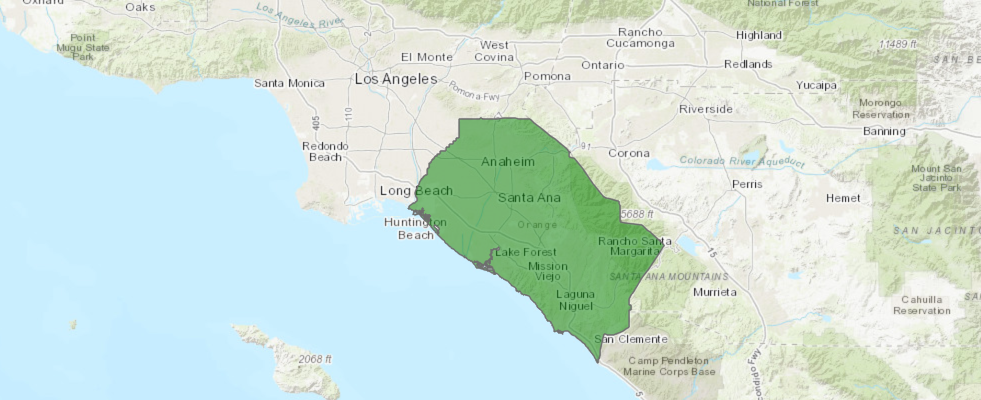

In [41]:
or_ca_map = gis.map('Los Angeles, CA')
or_ca_map

In [29]:
orange_df.spatial.plot(or_ca_map)

True

### Customizing your Query

`geoquery` parameter is used to specify the search criteria in order to query for the standard geography layers desired. A query is broken up into terms and operators. Multiple terms can be combined together with Boolean operators to form more complex queries. Learn more about using `geoquery` to create more complex queries [here](https://developers.arcgis.com/rest/geoenrichment/api-reference/standard-geography-query.htm).

Let's look at an example of grouping the search terms to find all `Orange or Lake` counties in US. Search supports using parentheses to group clauses to form subqueries. This can be useful if you want to control the Boolean logic for a query. 

In [33]:
or_lake = standard_geography_query(source_country='US', layers='US.Counties', geoquery='(Orange OR Lake)')
or_lake

,DatasetID,DataLayerID,AreaID,AreaName,MajorSubdivisionName,MajorSubdivisionAbbr,MajorSubdivisionType,CountryAbbr,Score,ObjectId
0,USA_ESRI_2020,US.Counties,06059,Orange County,California,CA,State,US,100,1
1,USA_ESRI_2020,US.Counties,12095,Orange County,Florida,FL,State,US,100,2
2,USA_ESRI_2020,US.Counties,18117,Orange County,Indiana,IN,State,US,100,3
3,USA_ESRI_2020,US.Counties,48361,Orange County,Texas,TX,State,US,100,4
4,USA_ESRI_2020,US.Counties,50017,Orange County,Vermont,VT,State,US,100,5
5,USA_ESRI_2020,US.Counties,51137,Orange County,Virginia,VA,State,US,100,6
6,USA_ESRI_2020,US.Counties,36071,Orange County,New York,NY,State,US,99,7
7,USA_ESRI_2020,US.Counties,37135,Orange County,North Carolina,NC,State,US,99,8
8,USA_ESRI_2020,US.Counties,06033,Lake County,California,CA,State,US,87,9
9,USA_ESRI_2020,US.Counties,08065,Lake County,Colorado,CO,State,US,87,10


We see that there are multiple Orange and Lake counties in US. Let's get the results for Orange or Lake county in California.

In [34]:
or_lake_ca = standard_geography_query(source_country='US', layers='US.Counties', geoquery='(Orange OR Lake) AND CA')
or_lake_ca

,DatasetID,DataLayerID,AreaID,AreaName,MajorSubdivisionName,MajorSubdivisionAbbr,MajorSubdivisionType,CountryAbbr,Score,ObjectId
0,USA_ESRI_2020,US.Counties,06059,Orange County,California,CA,State,US,100,1
1,USA_ESRI_2020,US.Counties,06033,Lake County,California,CA,State,US,89,2


 #### Enrich using results from Standard Geography Query

The `standard_geography_query` gave us details of Orange and Lake counties in California. Now, let's `enrich()` these counties using `AreaID`.

In [35]:
or_lk = {"sourceCountry":"US","layer":"US.Counties","ids":["06059","06033"]}

In [36]:
or_lake_df = enrich(study_areas=[or_lk], data_collections=['Age'] )
or_lake_df

,ID,OBJECTID,StdGeographyLevel,StdGeographyName,StdGeographyID,sourceCountry,aggregationMethod,populationToPolygonSizeRating,apportionmentConfidence,HasData,...,FEM45,FEM50,FEM55,FEM60,FEM65,FEM70,FEM75,FEM80,FEM85,SHAPE
0,0,1,US.Counties,Orange County,06059,US,Query:US.Counties,2.191,2.576,1,...,106005,107845,107235,97121,81462,65917,47365,33050,40794,"{""rings"": [[[-117.9157650000062, 33.9469249994..."
1,0,2,US.Counties,Lake County,06033,US,Query:US.Counties,2.191,2.576,1,...,1918,2176,2680,2946,2742,2104,1382,834,926,"{""rings"": [[[-122.81409900076635, 39.581399999..."


#### Visualize on a Map
Let's visualize the enriched counties on a map.


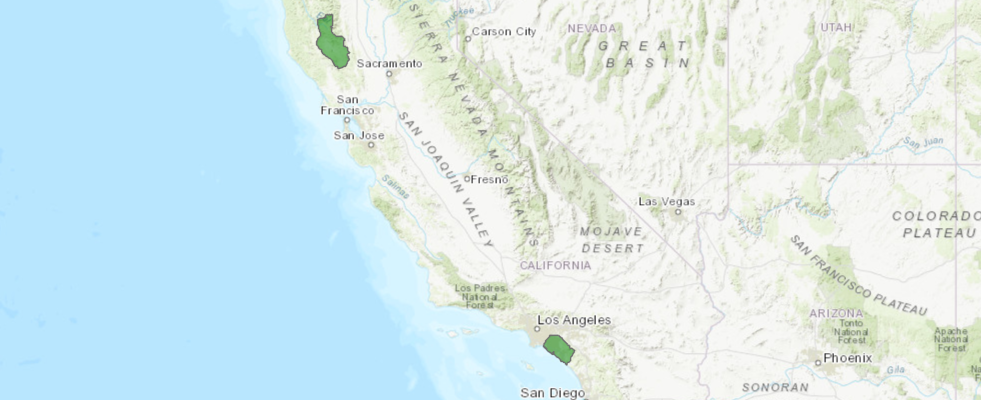

In [42]:
or_lake_map = gis.map('California, US',6)
or_lake_map

In [40]:
or_lake_df.spatial.plot(or_lake_map)

True

## Conclusion

In this final part of the `arcgis.geoenrichment` module guide series, you have seen how the `standard_geography_query` method is used to query for standard geography areas which can then be used for enrichment, and it being customized to meet more complex search criteria when targeting at more specific results.

In this guide series, we have demonstrated a majority of the functionality showcasing the power of `arcgis.geoenrichment` module in various ways. To look up the API reference doc for GeoEnrichment see [here](https://developers.arcgis.com/python/api-reference/arcgis.geoenrichment.html#).